In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
import random
from citipy import citipy
from config import api_key

In [2]:
latrange=np.arange(-90,90,0.001,float)
lonrange=np.arange(-180,80,0.001,float)

In [3]:
data=[]
for i in range(600):
    lat=random.choice(latrange)
    lon=random.choice(lonrange)
    data.append({"lat":lat,"lon":lon})
newdata=pd.DataFrame(data)
newdata

,lat,lon
0,46.973,-126.044
1,81.788,-92.831
2,-67.007,-82.535
3,78.446,-127.442
4,-9.916,-108.281
...,...,...
595,-50.230,-57.160
596,-35.208,-0.702
597,27.253,8.564
598,3.237,26.177


In [4]:
cityname=[]
for g in range(len(newdata["lat"])):
    city=citipy.nearest_city(newdata["lat"][g],newdata["lon"][g])
    citynameformula=city.city_name
    cityname.append(citynameformula)
newdata["city"]=cityname
newdata.dropna()

,lat,lon,city
0,46.973,-126.044,ucluelet
1,81.788,-92.831,qaanaaq
2,-67.007,-82.535,punta arenas
3,78.446,-127.442,tuktoyaktuk
4,-9.916,-108.281,puerto ayora
...,...,...,...
595,-50.230,-57.160,rawson
596,-35.208,-0.702,luderitz
597,27.253,8.564,gat
598,3.237,26.177,buta


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q="

In [6]:
cities=newdata["city"]
temp=[]
humidity=[]
windspeed=[]
cloudness=[]

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        temp.append(response["main"]['temp'])
        humidity.append(response["main"]['humidity'])
        windspeed.append(response["wind"]['speed'])
        cloudness.append(response["clouds"]['all'])
    except:
        temp.append(np.nan)
        humidity.append(np.nan)
        windspeed.append(np.nan)
        cloudness.append(np.nan)

In [7]:
newdata['temp']=temp
newdata['humidity']=humidity
newdata['windspeed']=windspeed
newdata['cloudness']=cloudness

In [8]:
newdata.dropna(inplace=True)
newdata.to_csv("retrieved data")
newdata

,lat,lon,city,temp,humidity,windspeed,cloudness
0,46.973,-126.044,ucluelet,277.35,90.0,2.17,14.0
1,81.788,-92.831,qaanaaq,253.45,98.0,2.05,100.0
2,-67.007,-82.535,punta arenas,281.05,70.0,6.70,75.0
3,78.446,-127.442,tuktoyaktuk,258.15,71.0,5.70,75.0
4,-9.916,-108.281,puerto ayora,298.71,84.0,3.13,93.0
...,...,...,...,...,...,...,...
594,-21.988,-137.368,rikitea,299.05,75.0,4.06,100.0
595,-50.230,-57.160,rawson,294.95,50.0,8.23,30.0
596,-35.208,-0.702,luderitz,289.15,82.0,1.50,0.0
597,27.253,8.564,gat,287.92,55.0,4.10,0.0


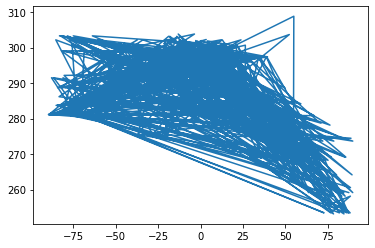

In [9]:
plt.plot(newdata["lat"],newdata["temp"])
plt.savefig("Temperature (F) vs. Latitude .png")
#the higher lattitude , the lower tempurature tends to be

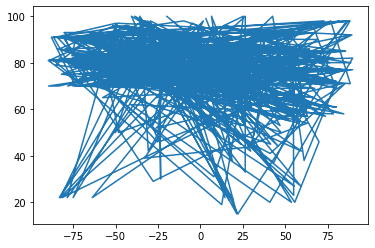

In [10]:
plt.plot(newdata["lat"],newdata["humidity"])
plt.savefig("Humidity (%) vs. Latitude.png")
#the further to euqtor, the more humid it might be 

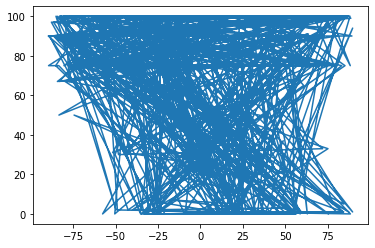

In [11]:
plt.plot(newdata["lat"],newdata["cloudness"])
plt.savefig("Cloudiness (%) vs. Latitude.png")
#no obvious relation between latitude and cloudiness

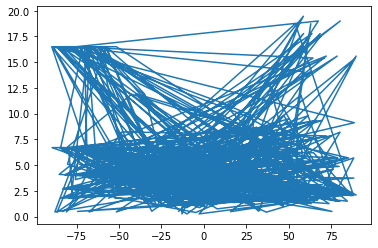

In [12]:
plt.plot(newdata["lat"],newdata["windspeed"])
plt.savefig("Wind Speed (mph) vs. Latitude.png")
#no obvious relation between latitude and cloudiness

In [13]:
from scipy.stats import linregress

In [15]:
# Northern Hemisphere - Temperature (F) vs. Latitude
x1=newdata.loc[newdata["lat"]>=0]["lat"]
y1=newdata.loc[newdata["lat"]>=0]["temp"]
results1=linregress(x1,y1)
(slope1,intercept1,rvalue1,pvalue1,stderr1)=linregress(x1,y1)
regressvalue1=x1*slope1+intercept1
lineeq1=f"y1={slope1:.2f}x1+{intercept1:.2f}"
lineeq1

'y1=-0.48x1+301.46'

In [16]:
#Southern Hemisphere - Temperature (F) vs. Latitude
x2=newdata.loc[newdata["lat"]<0]["lat"]
y2=newdata.loc[newdata["lat"]<0]["temp"]
results2=linregress(x2,y2)
(slope2,intercept2,rvalue2,pvalue2,stderr2)=linregress(x2,y2)
regressvalue2=x2*slope2+intercept2
lineeq2=f"y2={slope2:.2f}x2+{intercept2:.2f}"
lineeq2

'y2=0.13x2+297.71'

In [17]:
#Northern Hemisphere - Humidity (%) vs. Latitude
x3=newdata.loc[newdata["lat"]>=0]["lat"]
y3=newdata.loc[newdata["lat"]>=0]["humidity"]
results3=linregress(x3,y3)
(slope3,intercept3,rvalue3,pvalue3,stderr3)=linregress(x3,y3)
regressvalue3=x3*slope3+intercept3
lineeq3=f"y3={slope3:.2f}x3+{intercept3:.2f}"
lineeq3

'y3=0.03x3+70.50'

In [18]:
#Southern Hemisphere - Humidity (%) vs. Latitude
x4=newdata.loc[newdata["lat"]<0]["lat"]
y4=newdata.loc[newdata["lat"]<0]["humidity"]
results4=linregress(x4,y4)
(slope4,intercept4,rvalue4,pvalue4,stderr4)=linregress(x4,y4)
regressvalue4=x4*slope4+intercept4
lineeq4=f"y4={slope4:.2f}x4+{intercept4:.2f}"
lineeq4

'y4=0.05x4+82.32'

In [19]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x5=newdata.loc[newdata["lat"]>=0]["lat"]
y5=newdata.loc[newdata["lat"]>=0]["cloudness"]
results5=linregress(x5,y5)
(slope5,intercept5,rvalue5,pvalue5,stderr5)=linregress(x5,y5)
regressvalue5=x5*slope5+intercept5
lineeq5=f"y5={slope5:.2f}x5+{intercept5:.2f}"
lineeq5

'y5=0.28x5+44.57'

In [20]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
x6=newdata.loc[newdata["lat"]<0]["lat"]
y6=newdata.loc[newdata["lat"]<0]["cloudness"]
results6=linregress(x6,y6)
(slope6,intercept6,rvalue6,pvalue6,stderr6)=linregress(x6,y6)
regressvalue6=x6*slope6+intercept6
lineeq6=f"y6={slope6:.2f}x6+{intercept6:.2f}"
lineeq6

'y6=-0.35x6+56.51'

In [21]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x7=newdata.loc[newdata["lat"]>=0]["lat"]
y7=newdata.loc[newdata["lat"]>=0]["windspeed"]
results7=linregress(x7,y7)
(slope7,intercept7,rvalue7,pvalue7,stderr7)=linregress(x7,y7)
regressvalue7=x7*slope7+intercept7
lineeq7=f"y7={slope7:.2f}x7+{intercept7:.2f}"
lineeq7

'y7=0.04x7+3.76'

In [22]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x8=newdata.loc[newdata["lat"]<0]["lat"]
y8=newdata.loc[newdata["lat"]<0]["windspeed"]
results8=linregress(x8,y8)
(slope8,intercept8,rvalue8,pvalue8,stderr8)=linregress(x8,y8)
regressvalue8=x8*slope8+intercept8
lineeq8=f"y8={slope8:.2f}x8+{intercept8:.2f}"
lineeq8

'y8=-0.08x8+2.08'